In [66]:
import sys
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [67]:
my_libs_dir = '../'
if not my_libs_dir in sys.path:
    sys.path.append(my_libs_dir)  # add the path to my_lib directory 

# The following lines are needed to auto-reload my library file
# Without these lines, my library file is read only once and
# modifications of my library file are not reflected.
%load_ext autoreload
%autoreload 1
%aimport my_libs.linear_reg
# import from my library file
from my_libs.linear_reg import step_aic_forward, calc_vifs

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
%config InlineBackend.figure_formats = {'png', 'retina'} #high-reso images
plt.rcParams['font.family'] = 'Yu Mincho' # for Japanese in graph (Win10)

# To show all rows and columns in the results 
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [69]:
csv_in = 'winequality-red_modified-utf8.txt'
df_all = pd.read_csv(csv_in, delimiter='  ', skiprows=13, header=0, engine='python')
# no header in csv, so set columns explicitly

print(df_all.shape)
print(df_all.info())
display(df_all.head())

(1599, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1598 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1597 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9        NaN   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0      NaN  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0      NaN  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

Deleting rows with missing values

In [70]:
df_all = df_all.dropna(axis='index').reset_index(drop=True)
print(df_all.shape)
print(df_all.info())
display(df_all.head())

(1596, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596 entries, 0 to 1595
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1596 non-null   float64
 1   volatile_acidity      1596 non-null   float64
 2   citric_acid           1596 non-null   float64
 3   residual_sugar        1596 non-null   float64
 4   chlorides             1596 non-null   float64
 5   free_sulfur_dioxide   1596 non-null   float64
 6   total_sulfur_dioxide  1596 non-null   float64
 7   density               1596 non-null   float64
 8   pH                    1596 non-null   float64
 9   sulphates             1596 non-null   float64
 10  alcohol               1596 non-null   float64
 11  quality               1596 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 149.8 KB
None


fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.76         0.04             2.3      0.092   
2            7.4              0.66         0.00             1.8      0.075   
3            7.9              0.60         0.06             1.6      0.069   
4            7.3              0.65         0.00             1.2      0.065   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 15.0                  54.0   0.9970  3.26       0.65   
2                 13.0                  40.0   0.9978  3.51       0.56   
3                 15.0                  59.0   0.9964  3.30       0.46   
4                 15.0                  21.0   0.9946  3.39       0.47   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.4        5  
3      9.4        5  
4     10.0        7

In [71]:
X_all_org = df_all.loc[:, 'fixed_acidity':'alcohol']  # explanatory variables
#X_all_org = df_all.drop(columns='ring')  # alternative way, もうひとつの書き方
y = df_all['quality']  # objective variable
print('X_all_org:', X_all_org.shape)
display(X_all_org.head())
print('y:', y.shape)
print(y.head())

X_all_org: (1596, 11)


fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.76         0.04             2.3      0.092   
2            7.4              0.66         0.00             1.8      0.075   
3            7.9              0.60         0.06             1.6      0.069   
4            7.3              0.65         0.00             1.2      0.065   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 15.0                  54.0   0.9970  3.26       0.65   
2                 13.0                  40.0   0.9978  3.51       0.56   
3                 15.0                  59.0   0.9964  3.30       0.46   
4                 15.0                  21.0   0.9946  3.39       0.47   

   alcohol  
0      9.4  
1      9.8  
2      9.4  
3      9.4  
4     10.0

y: (1596,)
0    5
1    5
2    5
3    5
4    7
Name: quality, dtype: int64


In [72]:
X_all = pd.get_dummies(X_all_org, drop_first=True)
print('X_all:', X_all.shape)
display(X_all.head())

X_all: (1596, 11)


fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.76         0.04             2.3      0.092   
2            7.4              0.66         0.00             1.8      0.075   
3            7.9              0.60         0.06             1.6      0.069   
4            7.3              0.65         0.00             1.2      0.065   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 15.0                  54.0   0.9970  3.26       0.65   
2                 13.0                  40.0   0.9978  3.51       0.56   
3                 15.0                  59.0   0.9964  3.30       0.46   
4                 15.0                  21.0   0.9946  3.39       0.47   

   alcohol  
0      9.4  
1      9.8  
2      9.4  
3      9.4  
4     10.0

In [73]:
corr_all = X_all.corr(method='pearson')
display(corr_all)

fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000         -0.254796     0.671376   
volatile_acidity          -0.254796          1.000000    -0.550864   
citric_acid                0.671376         -0.550864     1.000000   
residual_sugar             0.115231          0.001749     0.143933   
chlorides                  0.094037          0.061071     0.204452   
free_sulfur_dioxide       -0.154094         -0.011231    -0.060859   
total_sulfur_dioxide      -0.113752          0.076463     0.035440   
density                    0.668356          0.022282     0.365623   
pH                        -0.683007          0.234924    -0.542063   
sulphates                  0.183527         -0.261792     0.313457   
alcohol                   -0.061580         -0.202022     0.109363   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity               0.115231   0.094037            -0.154094   
volatile_acidity            0.001749   0.061071            -0.011231   
citric_acid                 0.143933   0.204452            -0.060859   
residual_sugar              1.000000   0.055469             0.187006   
chlorides                   0.055469   1.000000             0.005389   
free_sulfur_dioxide         0.187006   0.005389             1.000000   
total_sulfur_dioxide        0.203091   0.047337             0.667541   
density                     0.355759   0.200882            -0.021855   
pH                         -0.085640  -0.265166             0.071304   
sulphates                   0.005230   0.371164             0.051475   
alcohol                     0.041679  -0.221426            -0.069386   

                      total_sulfur_dioxide   density        pH  sulphates  \
fixed_acidity                    -0.113752  0.668356 -0.683007   0.183527   
volatile_acidity                  0.076463  0.022282  0.234924  -0.261792   
citric_acid                       0.035440  0.365623 -0.542063   0.313457   
residual_sugar                    0.203091  0.355759 -0.085640   0.005230   
chlorides                         0.047337  0.200882 -0.265166   0.371164   
free_sulfur_dioxide               0.667541 -0.021855  0.071304   0.051475   
total_sulfur_dioxide              1.000000  0.071252 -0.065735   0.042895   
density                           0.071252  1.000000 -0.342146   0.148960   
pH                               -0.065735 -0.342146  1.000000  -0.196633   
sulphates                         0.042895  0.148960 -0.196633   1.000000   
alcohol                          -0.205651 -0.495957  0.206091   0.093188   

                       alcohol  
fixed_acidity        -0.061580  
volatile_acidity     -0.202022  
citric_acid           0.109363  
residual_sugar        0.041679  
chlorides            -0.221426  
free_sulfur_dioxide  -0.069386  
total_sulfur_dioxide -0.205651  
density              -0.495957  
pH                    0.206091  
sulphates             0.093188  
alcohol               1.000000

In [74]:
th_corr = 0.3
n_X = corr_all.shape[0]
corr_large = []
for i in range(n_X):
    for j in range(i+1, n_X):
        cc1 = corr_all.iat[i,j]
        if cc1 < -th_corr or cc1 > th_corr:
            corr_large.append([corr_all.columns[i], corr_all.columns[j], cc1])
corr_large.sort(reverse=True, key=lambda x: abs(x[2]))
display(corr_large)

[['fixed_acidity', 'pH', -0.6830071143817357],
 ['fixed_acidity', 'citric_acid', 0.6713764985301355],
 ['fixed_acidity', 'density', 0.6683564578594167],
 ['free_sulfur_dioxide', 'total_sulfur_dioxide', 0.6675409031033237],
 ['volatile_acidity', 'citric_acid', -0.5508639430983043],
 ['citric_acid', 'pH', -0.542062648972496],
 ['density', 'alcohol', -0.4959567614227976],
 ['chlorides', 'sulphates', 0.3711641061008956],
 ['citric_acid', 'density', 0.365623128690853],
 ['residual_sugar', 'density', 0.35575946701855926],
 ['density', 'pH', -0.34214610382969296],
 ['citric_acid', 'sulphates', 0.31345725894325954]]

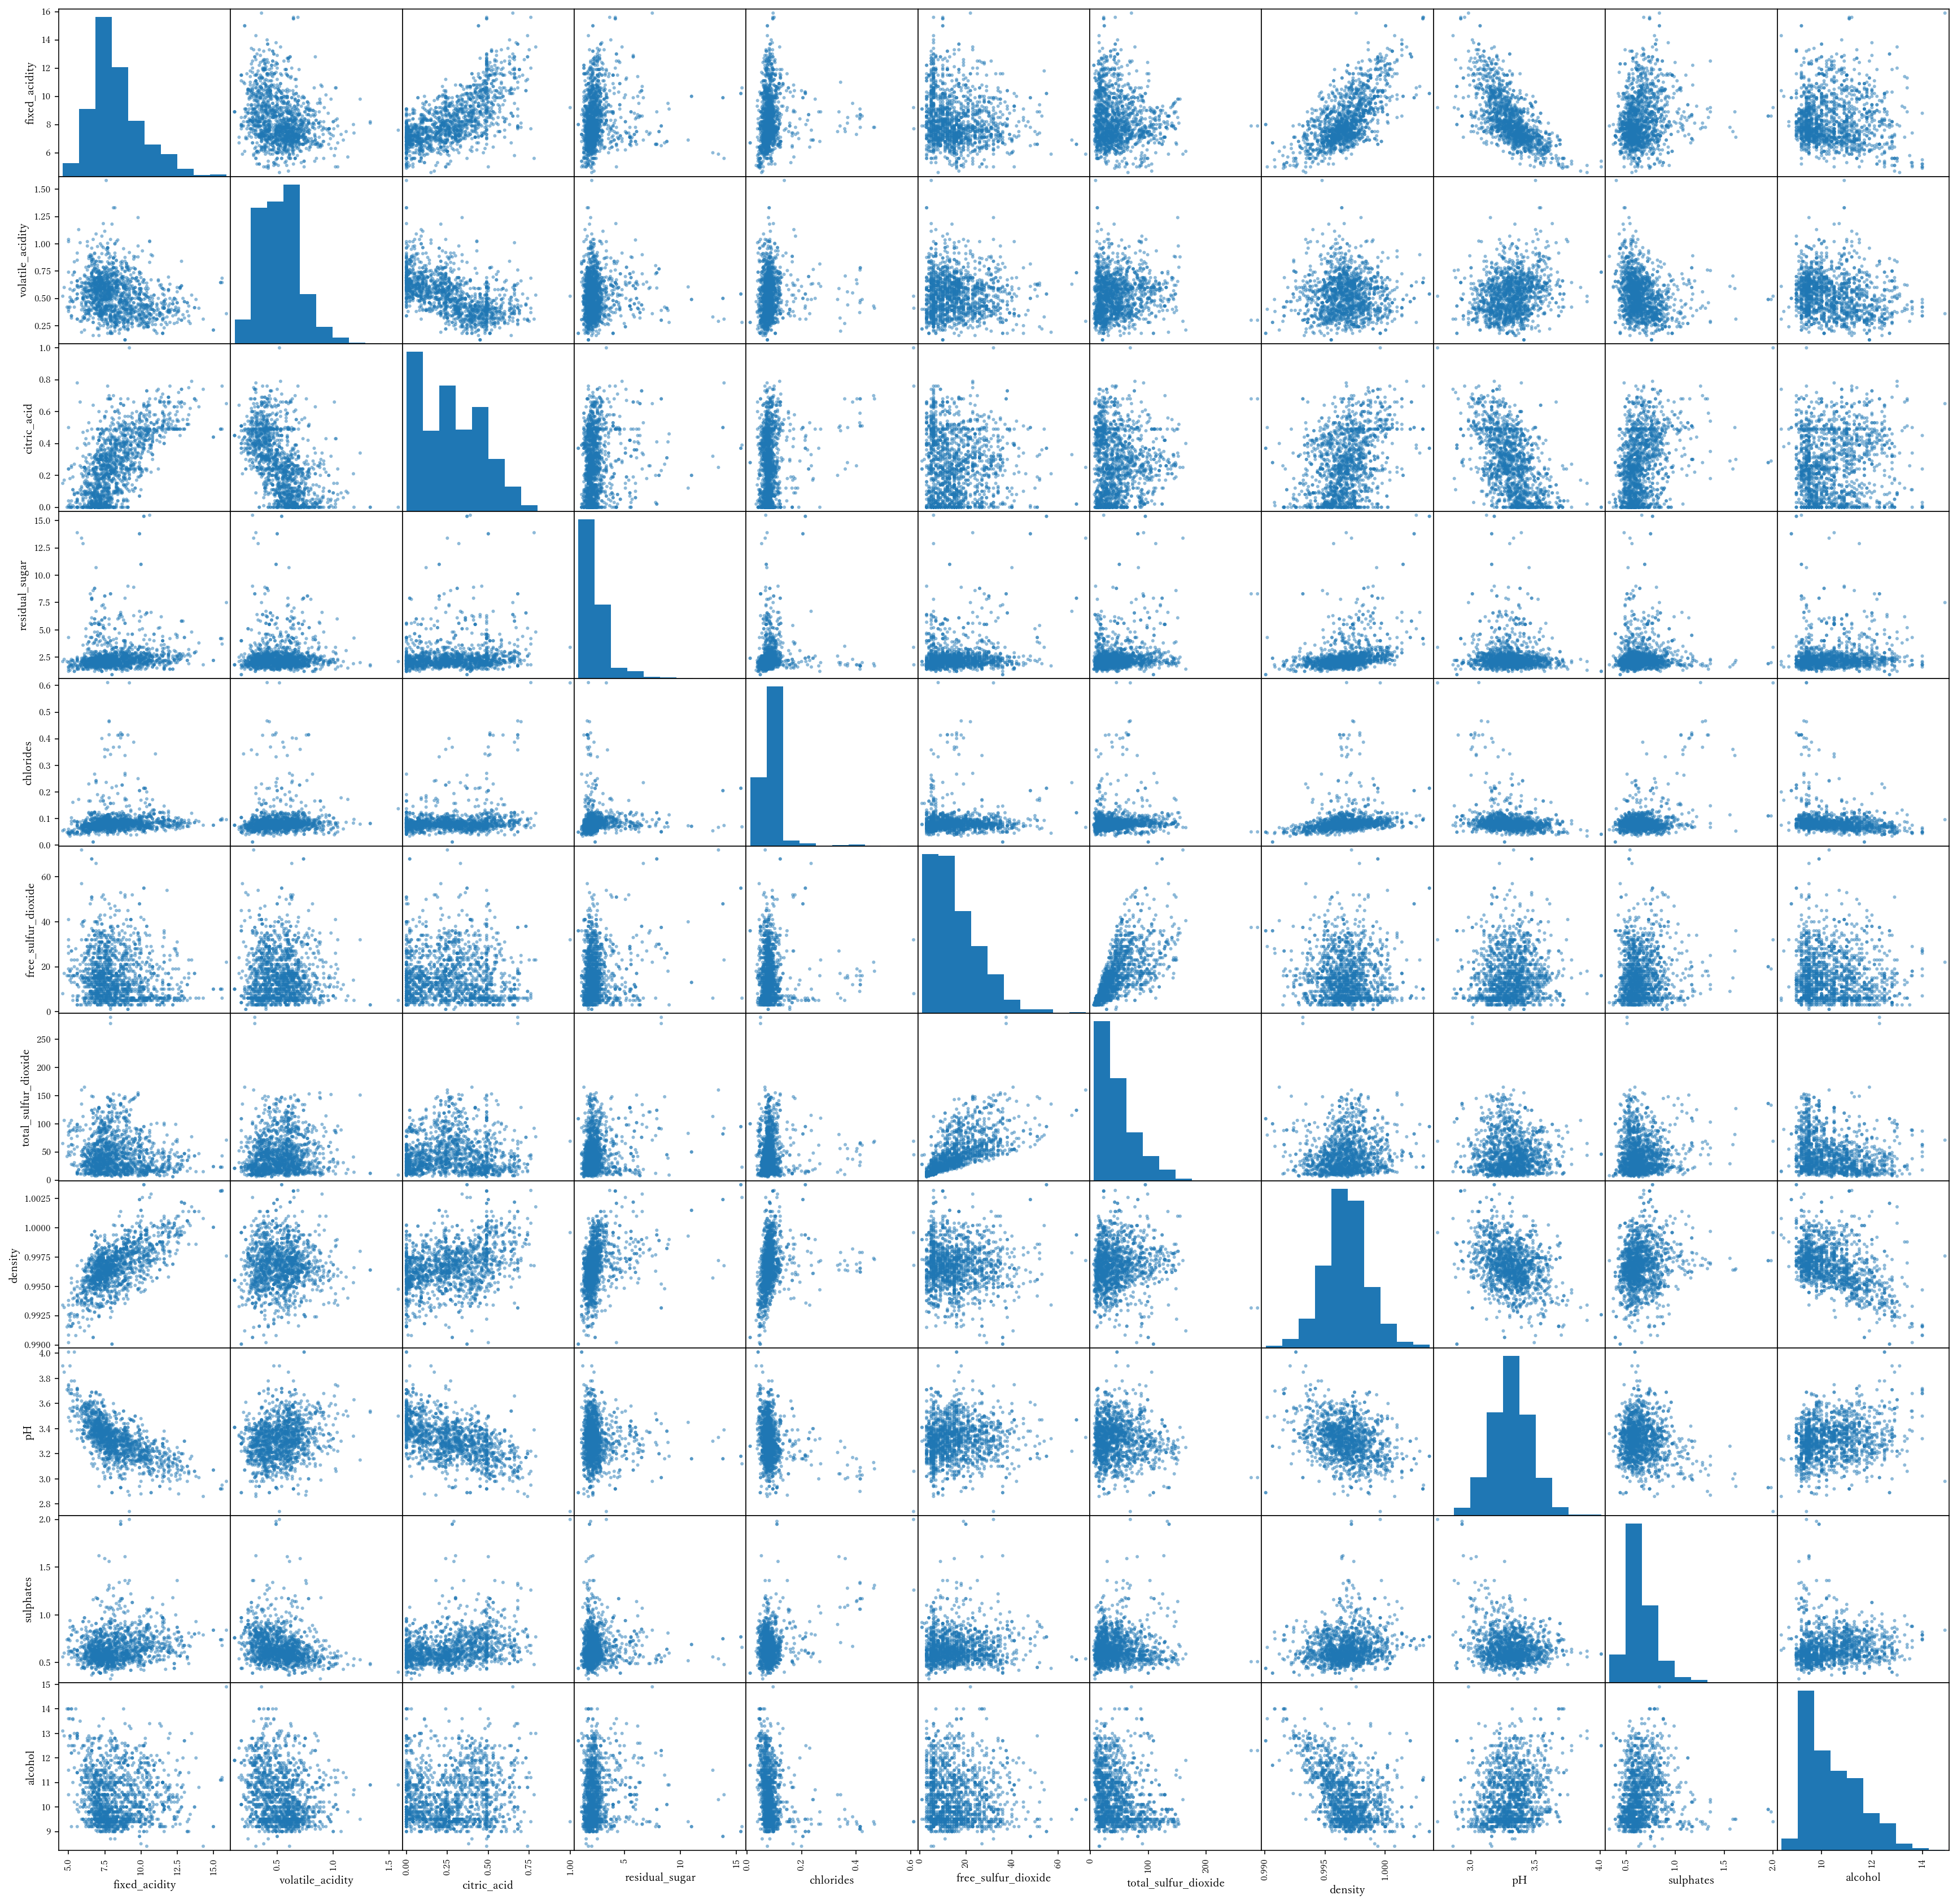

In [75]:
scatter_matrix(X_all, figsize=(30,30))
plt.show()

In [76]:
X_all_c = sm.add_constant(X_all)
model = sm.OLS(y, X_all_c)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.03
Date:                Mon, 03 May 2021   Prob (F-statistic):          6.17e-145
Time:                        13:17:20   Log-Likelihood:                -1567.6
No. Observations:                1596   AIC:                             3159.
Df Residuals:                    1584   BIC:                             3224.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.6728 

In [77]:
sorted(results.params)

[-17.577311819310744,
 -1.8757353108106154,
 -1.081368476136224,
 -0.41721733030792385,
 -0.18363246343859974,
 -0.0032718155562407067,
 0.004374259056810988,
 0.016309788538892353,
 0.024483353169541866,
 0.2765863851974508,
 0.9176105867305446,
 21.672824569014274]

In [78]:
print('R2:', results.rsquared)
print('Adj R2:', results.rsquared_adj)

R2: 0.3600832139208682
Adj R2: 0.3556393473508742


Adjusted R2: 0.356